In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Data
data = pd.read_csv("C:/Users/bhuva/Downloads/Freshwork_data.csv")
data.head(10)

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue
0,01-02-2022,Medium Business,Cust1,NaN,PD1,295.00000,404
1,01-09-2021,SMALL BUSINESS,Cust4,UK,PD4,20.40000,23
2,01-02-2022,SMALL BUSINESS,Cust6,EU,PD1,61.56000,70
3,01-04-2021,SMALL BUSINESS,Cust7,NaN,PD1,19.00000,25
4,01-11-2021,SMALL BUSINESS,Cust8,INDIA,PD4,81.99792,112
5,01-01-2022,Medium Business,Cust9,OTHERS,PD1,59.00000,78
6,01-05-2021,SMALL BUSINESS,Cust11,NaN,PD4,118.32000,118
7,01-01-2022,LARGE BUSINESS,Cust12,APJ,PD1,95.00000,95
8,01-02-2021,SMALL BUSINESS,Cust14,EU,PD1,28.50000,38
9,01-06-2021,SMALL BUSINESS,Cust16,INDIA,PD1,19.00000,24


# Preprocessing ana Data Engineering

In [3]:
data.isnull().sum()

MONTHYEAR            0
PLAN_NAME            0
Customer ID          4
REGION           10331
PRODUCT              0
NET REVENUE          0
Gross Revenue        0
dtype: int64

In [4]:
(data.isnull().sum()/len(data))*100

MONTHYEAR         0.000000
PLAN_NAME         0.000000
Customer ID       0.015115
REGION           39.037938
PRODUCT           0.000000
NET REVENUE       0.000000
Gross Revenue     0.000000
dtype: float64

In [5]:
data['REGION']= data['REGION'].fillna(data['REGION'].mode()[0])

In [6]:
data['REGION'].isnull().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26464 entries, 0 to 26463
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTHYEAR      26464 non-null  object 
 1   PLAN_NAME      26464 non-null  object 
 2   Customer ID    26460 non-null  object 
 3   REGION         26464 non-null  object 
 4   PRODUCT        26464 non-null  object 
 5   NET REVENUE    26464 non-null  float64
 6   Gross Revenue  26464 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [8]:
data.describe()

,NET REVENUE,Gross Revenue
count,26464.000000,26464.000000
mean,265.848433,346.616422
std,918.347110,1334.795073
min,1.000000,1.000000
25%,39.000000,50.000000
50%,86.400000,108.000000
75%,207.000000,263.000000
max,38439.190000,85657.000000


In [9]:
#Convert MonthYear to date time
data['MONTHYEAR']=pd.to_datetime(data['MONTHYEAR'],format='%d-%m-%Y')

In [10]:
data.head()

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue
0,2022-02-01,Medium Business,Cust1,EU,PD1,295.00000,404
1,2021-09-01,SMALL BUSINESS,Cust4,UK,PD4,20.40000,23
2,2022-02-01,SMALL BUSINESS,Cust6,EU,PD1,61.56000,70
3,2021-04-01,SMALL BUSINESS,Cust7,EU,PD1,19.00000,25
4,2021-11-01,SMALL BUSINESS,Cust8,INDIA,PD4,81.99792,112


In [11]:
#Add Discount
data['discount'] = (data['Gross Revenue'] - data['NET REVENUE']) / data['Gross Revenue'] * 100
data.head()

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue,discount
0,2022-02-01,Medium Business,Cust1,EU,PD1,295.00000,404,26.980198
1,2021-09-01,SMALL BUSINESS,Cust4,UK,PD4,20.40000,23,11.304348
2,2022-02-01,SMALL BUSINESS,Cust6,EU,PD1,61.56000,70,12.057143
3,2021-04-01,SMALL BUSINESS,Cust7,EU,PD1,19.00000,25,24.000000
4,2021-11-01,SMALL BUSINESS,Cust8,INDIA,PD4,81.99792,112,26.787571


In [12]:
# Sort data by date
data.sort_values(by='MONTHYEAR', inplace=True)
data.head()

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue,discount
17992,2021-01-01,Medium Business,Cust2830,EU,PD5,197.20,256,22.968750
21184,2021-01-01,SMALL BUSINESS,Cust30450,EU,PD1,70.11,100,29.890000
20757,2021-01-01,LARGE BUSINESS,Cust16913,EU,PD1,69.00,69,0.000000
15726,2021-01-01,SMALL BUSINESS,Cust23603,EU,PD4,29.00,29,0.000000
20756,2021-01-01,SMALL BUSINESS,Cust29932,EU,PD1,45.00,118,61.864407


In [13]:
data

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue,discount
17992,2021-01-01,Medium Business,Cust2830,EU,PD5,197.20,256,22.968750
21184,2021-01-01,SMALL BUSINESS,Cust30450,EU,PD1,70.11,100,29.890000
20757,2021-01-01,LARGE BUSINESS,Cust16913,EU,PD1,69.00,69,0.000000
15726,2021-01-01,SMALL BUSINESS,Cust23603,EU,PD4,29.00,29,0.000000
20756,2021-01-01,SMALL BUSINESS,Cust29932,EU,PD1,45.00,118,61.864407
...,...,...,...,...,...,...,...,...
13076,2022-03-01,SMALL BUSINESS,Cust20042,UK,PD6,20.10,25,19.600000
24423,2022-03-01,Medium Business,Cust34274,INDIA,PD1,355.00,355,0.000000
13056,2022-03-01,SMALL BUSINESS,Cust20011,EU,PD5,20.52,25,17.920000
13707,2022-03-01,LARGE BUSINESS,Cust20900,EU,PD6,392.40,538,27.063197


# Net Revenue by region over time

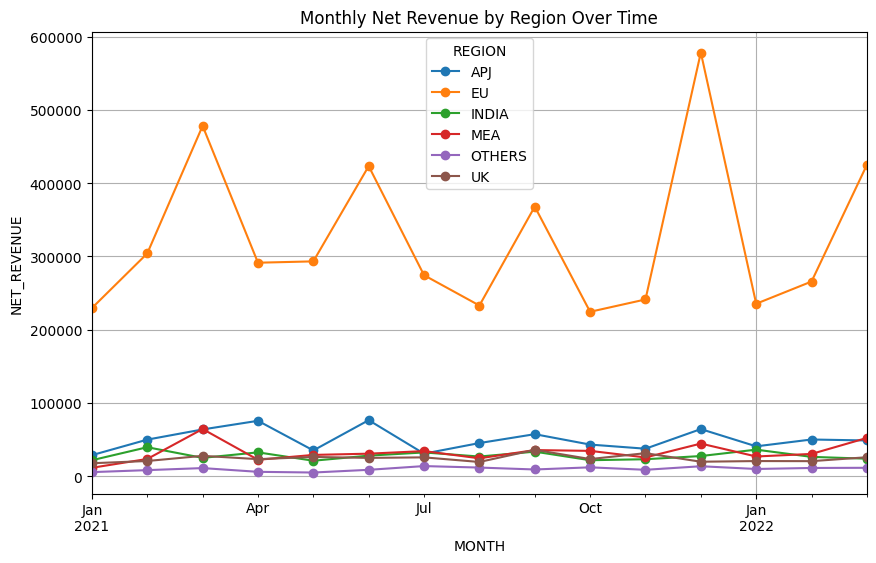

In [14]:
#Create Pivot table for  Month wise
pivot = data.pivot_table(values='NET REVENUE', index='MONTHYEAR', columns='REGION', aggfunc='sum')
pivot.plot(marker = 'o',figsize=(10,6))
plt.title('Monthly Net Revenue by Region Over Time')
plt.ylabel('NET_REVENUE')
plt.xlabel('MONTH')
plt.grid(True)
plt.legend(title ='REGION')
plt.tight_layout
plt.show()

# Plans Preferred Across Months

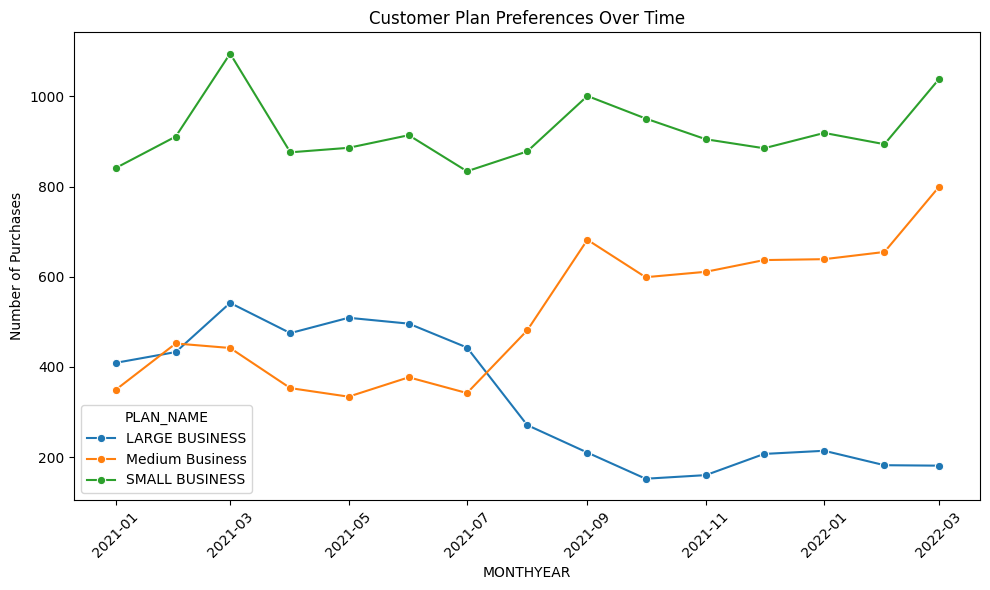

In [15]:
# Creating Line Chart
plane_count = data.groupby(['MONTHYEAR','PLAN_NAME']).size().reset_index(name='Count')
plt.figure(figsize=(10,6))
sns.lineplot(data=plane_count, x='MONTHYEAR', y='Count', hue='PLAN_NAME', marker='o')
plt.title("Customer Plan Preferences Over Time")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Do Higher Plans Get Higher Discounts?

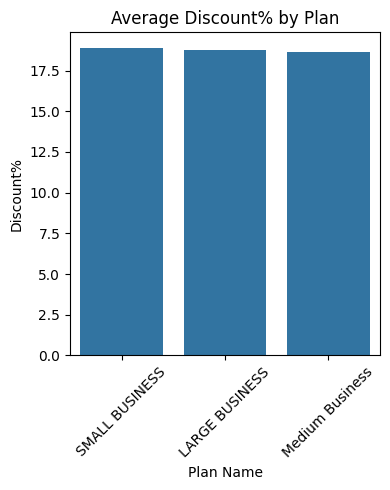

In [16]:
avrg_disc_by_plns = data.groupby('PLAN_NAME')['discount'].mean().sort_values(ascending=False)
plt.figure(figsize=(4,5))
sns.barplot(x=avrg_disc_by_plns.index, y=avrg_disc_by_plns.values)
plt.title("Average Discount% by Plan")
plt.ylabel("Discount%")
plt.xlabel("Plan Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Discounts BY Products

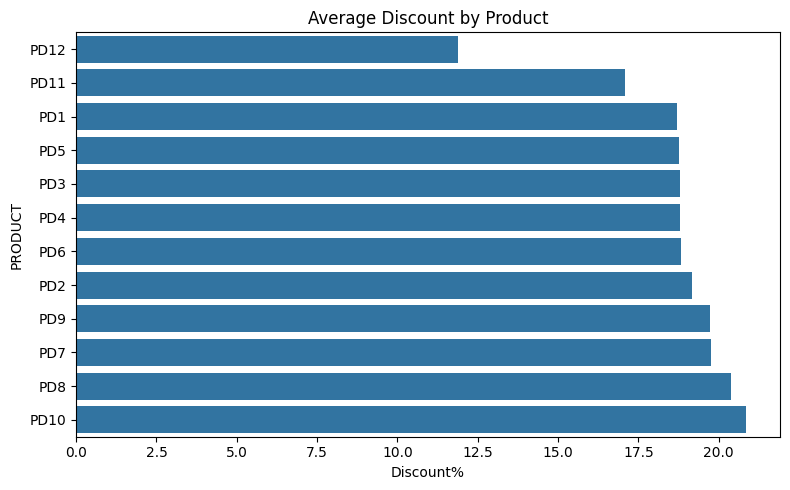

In [17]:
product_discount = data.groupby('PRODUCT')['discount'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=product_discount.values,y=product_discount.index)
plt.title('Average Discount by Product')
plt.xlabel('Discount%')
plt.tight_layout()
plt.show()

# Trend Analysis – Plan, Product, Discount Over Time

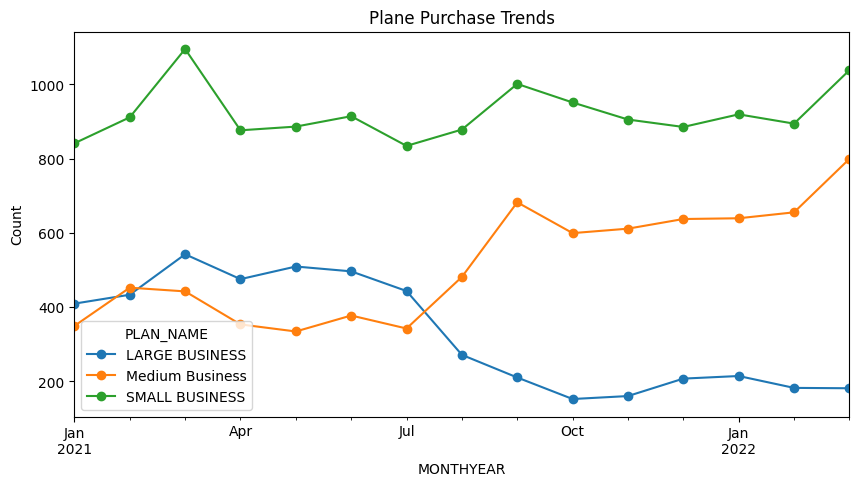

In [18]:
# Plan Purchase trends
data.groupby(['MONTHYEAR','PLAN_NAME']).size().unstack().plot(marker='o',figsize=(10,5))
plt.title('Plane Purchase Trends')
plt.ylabel('Count')
plt.show()

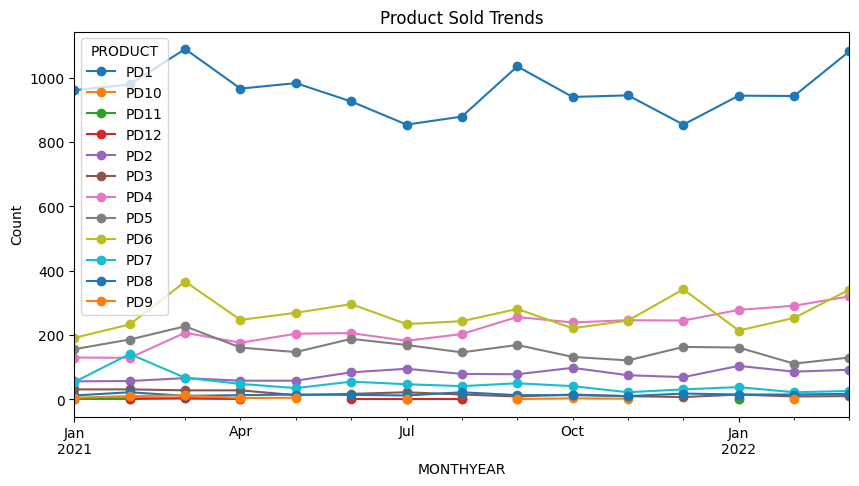

In [19]:
# Product Sold Trends
data.groupby(['MONTHYEAR','PRODUCT']).size().unstack().plot(marker='o',figsize=(10,5))
plt.title('Product Sold Trends')
plt.ylabel('Count')
plt.show()

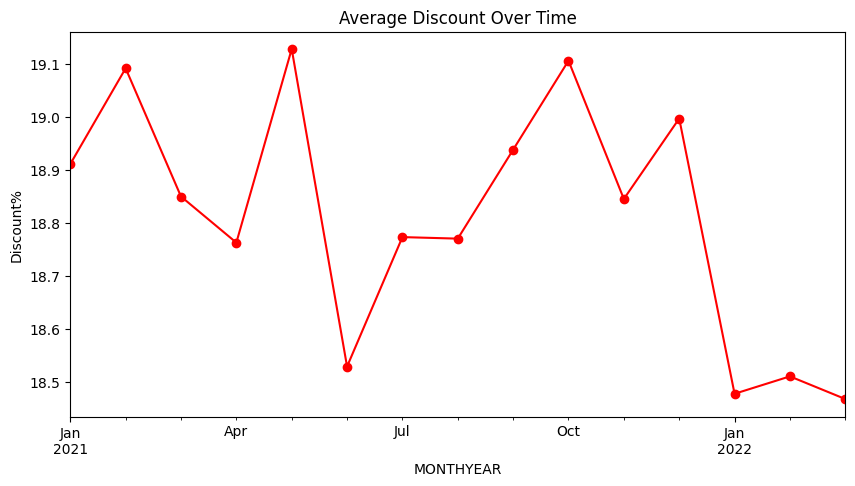

In [20]:
# Discount Trends
data.groupby('MONTHYEAR')['discount'].mean().plot(marker='o', color='red', figsize=(10,5))
plt.title('Average Discount Over Time')
plt.ylabel('Discount%')
plt.show()

# Cross-Sell Revenue Calculation

In [21]:
# Count how many products each customer has
data['Product_count']=data.groupby('Customer ID')['PRODUCT'].transform('count')
data.head()

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue,discount,Product_count
17992,2021-01-01,Medium Business,Cust2830,EU,PD5,197.20,256,22.968750,1.0
21184,2021-01-01,SMALL BUSINESS,Cust30450,EU,PD1,70.11,100,29.890000,1.0
20757,2021-01-01,LARGE BUSINESS,Cust16913,EU,PD1,69.00,69,0.000000,1.0
15726,2021-01-01,SMALL BUSINESS,Cust23603,EU,PD4,29.00,29,0.000000,1.0
20756,2021-01-01,SMALL BUSINESS,Cust29932,EU,PD1,45.00,118,61.864407,1.0


In [22]:
# Base/Cross Sell flag
data['Sell_type']=data.groupby('Customer ID').cumcount().apply(lambda x: 'Base' if x==0 else 'Cross')
data

,MONTHYEAR,PLAN_NAME,Customer ID,REGION,PRODUCT,NET REVENUE,Gross Revenue,discount,Product_count,Sell_type
17992,2021-01-01,Medium Business,Cust2830,EU,PD5,197.20,256,22.968750,1.0,Base
21184,2021-01-01,SMALL BUSINESS,Cust30450,EU,PD1,70.11,100,29.890000,1.0,Base
20757,2021-01-01,LARGE BUSINESS,Cust16913,EU,PD1,69.00,69,0.000000,1.0,Base
15726,2021-01-01,SMALL BUSINESS,Cust23603,EU,PD4,29.00,29,0.000000,1.0,Base
20756,2021-01-01,SMALL BUSINESS,Cust29932,EU,PD1,45.00,118,61.864407,1.0,Base
...,...,...,...,...,...,...,...,...,...,...
13076,2022-03-01,SMALL BUSINESS,Cust20042,UK,PD6,20.10,25,19.600000,1.0,Base
24423,2022-03-01,Medium Business,Cust34274,INDIA,PD1,355.00,355,0.000000,1.0,Base
13056,2022-03-01,SMALL BUSINESS,Cust20011,EU,PD5,20.52,25,17.920000,1.0,Base
13707,2022-03-01,LARGE BUSINESS,Cust20900,EU,PD6,392.40,538,27.063197,1.0,Base


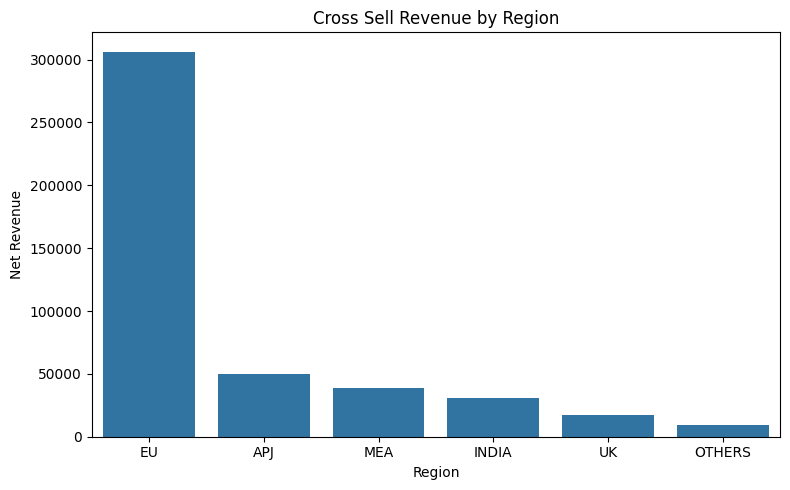

In [23]:
# Total cross-sell revenue by region
cross_sel_rev=data[data['Sell_type']=='Cross'].groupby(['REGION'])['NET REVENUE'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=cross_sel_rev.index, y=cross_sel_rev.values)
plt.title('Cross Sell Revenue by Region')
plt.ylabel('Net Revenue')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

# Two Custom Metrics with Visualization

In [24]:
# Returning Customer Rate
return_customers = data.groupby('Customer ID')['PRODUCT'].count().gt(1).sum()
total_customers = data['Customer ID'].nunique()

return_rate = return_customers/total_customers*100
print(f"Return Customer Rate:{return_rate:.2f}%")

Return Customer Rate:4.96%


In [26]:
#Avg Cross-Sell Revenue per Customer
cross_sel_avg = data[data['Sell_type']=='Cross'].groupby('Customer ID')['NET REVENUE'].sum().mean()
print(f"Average Cross Sell Revenue by Customer: {cross_sel_avg:.2f}")

Average Cross Sell Revenue by Customer: 356.50


# Download the cleaned data

In [27]:
data_cleaned=data.copy()

In [28]:
data_cleaned.to_csv("cleaned_freshworks_data.csv", index=False)

In [29]:
from IPython.display import FileLink
FileLink("cleaned_freshworks_data.csv")

C:\Users\bhuva\Final_Projects\Customer_behaviour_analysis_Freshwork\cleaned_freshworks_data.csv